In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 1 读取数据

In [2]:
# 所用数据为已经预处理之后的数据
path=r"C:\Users\admin\Desktop\RCPMF\A.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219 entries, 0 to 11218
Data columns (total 18 columns):
A    11219 non-null object
B    11219 non-null object
C    11219 non-null object
D    11219 non-null int64
E    11219 non-null int64
F    11219 non-null int64
G    11219 non-null int64
H    11219 non-null int64
I    11219 non-null object
J    11219 non-null object
K    11219 non-null int64
L    11219 non-null int64
M    11219 non-null int64
N    11219 non-null float64
O    11219 non-null float64
P    11219 non-null float64
Q    11219 non-null object
R    11219 non-null int64
dtypes: float64(3), int64(9), object(6)
memory usage: 1.5+ MB


# 2 处理数据

In [5]:
df[:1]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
0,蜂锦,FX1507121SK;,针织类,0,0,0,1,0,面料改染费用,米,0,0,1,26.0,730.0,41.0,2015-01-10,48


In [6]:
# （1）添加月份信息
def split_month(x):
    return x[5:7]
df["S"]=df["Q"].apply(split_month)

In [7]:
df[:3]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
0,蜂锦,FX1507121SK;,针织类,0,0,0,1,0,面料改染费用,米,0,0,1,26.0,730.0,41.0,2015-01-10,48,01
1,蜂锦,FX1507121SK;,针织类,0,0,0,1,0,面料改染费用,米,0,0,1,22.0,710.0,27.0,2015-01-10,49,01
2,好得利,FX150824TW;,针织类,0,0,0,1,0,SUP1309-101,米,0,0,1,23.0,886.4,30.0,2015-01-10,25,01


In [8]:
# (2) 添加季节特征
def season(x):
    if x=="01" or x=="02" or x=="12":
        return "冬"
    if x=="03" or x=="04" or x=="05":
        return "春"
    if x=="06" or x=="07" or x=="08":
        return "夏"
    if x=="09" or x=="10" or x=="11":
        return "秋"
df["Season"]=df["S"].apply(season)

In [9]:
# （3）过滤异常值
df=df[df["R"]!=810]
df=df.drop_duplicates()

In [10]:
df[:3]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,Season
0,蜂锦,FX1507121SK;,针织类,0,0,0,1,0,面料改染费用,米,0,0,1,26.0,730.0,41.0,2015-01-10,48,01,冬
1,蜂锦,FX1507121SK;,针织类,0,0,0,1,0,面料改染费用,米,0,0,1,22.0,710.0,27.0,2015-01-10,49,01,冬
2,好得利,FX150824TW;,针织类,0,0,0,1,0,SUP1309-101,米,0,0,1,23.0,886.4,30.0,2015-01-10,25,01,冬


In [11]:
# (4) 筛选重要特征数据
X=df[['A', 'B', 'D', 'E', 'F', 'G','H', 'K', 'L', 'M', 'N', 'Q',"S","Season"]]
y=df[["R"]]

In [12]:
X[:3]

,A,B,D,E,F,G,H,K,L,M,N,Q,S,Season
0,蜂锦,FX1507121SK;,0,0,0,1,0,0,0,1,26.0,2015-01-10,01,冬
1,蜂锦,FX1507121SK;,0,0,0,1,0,0,0,1,22.0,2015-01-10,01,冬
2,好得利,FX150824TW;,0,0,0,1,0,0,0,1,23.0,2015-01-10,01,冬


In [13]:
# (4) 划分数据集
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=2)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# (5) 筛选出线性回归特征 对数据集进行预处理
X_train_LR=X_train[['D','E','F','G','H','K' ,'L','M', 'N']]
X_test_LR=X_test[['D','E','F','G','H','K' ,'L','M', 'N']]

In [15]:
# （6） 处理线性回归数据集
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train_LR)  #特征标准化 均值为0 方差为1
X_train_std=scaler.transform(X_train_LR) # 训练集
X_test_std=scaler.transform(X_test_LR)   # 测试集

# 3 线性回归

In [16]:
# (1) 训练线性回归模型
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# (2) 查看回归系数
reg.coef_

array([[ 1.58851270e+14,  2.18215636e+14,  2.92557635e+14,
         2.33494290e+14,  1.32434366e+14, -5.59189200e+11,
        -4.84489557e+11, -7.38740156e+11,  4.90583831e+00]])

In [18]:
# (3) 使用训练集进行线性回归预测
y_predict_train_LR=reg.predict(X_train_std)

In [19]:
y_predict_train_LR

array([[41.84321307],
       [38.74952511],
       [43.21094449],
       ...,
       [38.55357581],
       [44.26648613],
       [41.03245256]])

In [20]:
# (4) 根据y_train与y_predict_train之差求取线性回归预测值与真实值之间的偏差
bias=y_train.values-y_predict_train_LR

In [21]:
bias

array([[ 30.15678693],
       [  4.25047489],
       [ 14.78905551],
       ...,
       [-17.55357581],
       [ 35.73351387],
       [-21.03245256]])

# 4 联合概率矩阵分解

## 4.1 联合概率矩阵分解数据获取

In [22]:
# (1) 结合线性回归求取的偏差值 获取下一步数据集（概率矩阵分解）
X_train_PMF=X_train[["A","B","Season"]]

In [23]:
X_train_PMF["LR偏差"]=bias

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
# (2) 筛选四季数据集
X_train_PMF_A=X_train_PMF[X_train_PMF["Season"]=="春"]
X_train_PMF_B=X_train_PMF[X_train_PMF["Season"]=="夏"]
X_train_PMF_C=X_train_PMF[X_train_PMF["Season"]=="秋"]
X_train_PMF_D=X_train_PMF[X_train_PMF["Season"]=="冬"]

In [25]:
# (3) 过滤部分特征
X_train_PMF_A.drop(columns=["Season"],inplace=True)
X_train_PMF_B.drop(columns=["Season"],inplace=True)
X_train_PMF_C.drop(columns=["Season"],inplace=True)
X_train_PMF_D.drop(columns=["Season"],inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

## 4.2 学习A,B,C,D,V潜在特征矩阵

In [26]:
import copy
def eval_rmse(U,V,test):
        test_count=len(test)
        tmp_rmse=0.0
        for user,item,bias in test:
            predict_rating=np.dot(U[user],V[item].T)
            tmp_rmse+=np.square(bias-predict_rating)
        rmse=np.sqrt(tmp_rmse/test_count)
        return rmse

# 初始化矩阵
def InitMatrix(X_A,X_B,X_C,X_D,K):
    A={}
    B={}
    C={}
    D={}
    V={}
    
    # 初始化春季供应商面料隐类特征
    for user,item,bias in X_A:
        if user not in A.keys():
            A[user]=np.random.normal(0,0.1,(1,K))
        if item not in V.keys():
            V[item]=np.random.normal(0,0.1,(1,K))
    # 初始化夏季供应商面料隐类特征
    for user,item,bias in X_B:
        if user not in B.keys():
            B[user]=np.random.normal(0,0.1,(1,K))
        if item not in V.keys():
            V[item]=np.random.normal(0,0.1,(1,K))
    # 初始化秋季供应商面料隐类特征
    for user,item,bias in X_C:
        if user not in C.keys():
            C[user]=np.random.normal(0,0.1,(1,K))
        if item not in V.keys():
            V[item]=np.random.normal(0,0.1,(1,K))
    # 初始化冬季供应商面料隐类特征
    for user,item,bias in X_D:
        if user not in D.keys():
            D[user]=np.random.normal(0,0.1,(1,K))
        if item not in V.keys():
            V[item]=np.random.normal(0,0.1,(1,K))
    
    
    return A,B,C,D,V
    

# 概率分解矩阵 X中列名为供应商，订单款号，季节，偏差值
def UPMF(X,X_A,X_B,X_C,X_D,learning_rate,K,regu,maxiter):
    result={}
    rmses=[]
    A,B,C,D,V=InitMatrix(X_A,X_B,X_C,X_D,K)
    #U=np.random.normal(0,0.1,(num_user,K))      # 生成均值为0 标准差为0.1的num_user*k的矩阵
    #V=np.random.normal(0,0.1,(num_item, K))

  
    
    for iter in range(0,maxiter):
        loss=0.0
        V_A=0  # 用于更新V参数的值
        V_B=0  # 用于更新V参数的值
        V_C=0  # 用于更新V参数的值
        V_D=0  # 用于更新V参数的值
        for user,item,season,bias in X:
            if season=="春":
                eij_bias=np.dot(A[user],V[item].T)                      # 预测结果
                error_A=bias-eij_bias                                   # 获取春季误差
                loss+=error_A**2                                        # 求和损失函数的值
                A[user]+=learning_rate*(error_A*V[item]-regu*A[user]) # 更新A参数值
                V_A=error_A*A[user]
            if season=="夏":
                fij_bias=np.dot(B[user],V[item].T)                      # 预测结果
                error_B=bias-fij_bias                                   # 获取秋季误差
                loss+=regu*(error_B**2)                                        # 求和损失函数的值
                B[user]+=learning_rate*(regu*error_B*V[item]-regu*B[user]) # 更新B参数值
                #B[user]+=learning_rate*(error_B*V[item]-regu*B[user]) # 更新B参数值
                V_B=error_B*B[user]
            if season=="秋":
                gij_bias=np.dot(C[user],V[item].T)                      # 预测结果
                error_C=bias-gij_bias                                   # 获取秋季误差
                loss+=regu*(error_C**2)                                        # 求和损失函数的值
                C[user]+=learning_rate*(regu*error_C*V[item]-regu*C[user]) # 更新C参数值
                #C[user]+=learning_rate*(error_C*V[item]-regu*C[user]) # 更新C参数值
                V_C=error_C*C[user]
            if season=="冬":
                hij_bias=np.dot(D[user],V[item].T)                      # 预测结果
                error_D=bias-hij_bias                                   # 获取秋季误差
                loss+=regu*(error_D**2)                                        # 求和损失函数的值
                D[user]+=learning_rate*(regu*error_D*V[item]-regu*D[user]) # 更新D参数值
                #D[user]+=learning_rate*(error_D*V[item]-regu*D[user]) # 更新D参数值
                V_D=error_D*D[user]
            
            
            V[item]+=learning_rate*(V_A+regu*V_B+regu*V_C+regu*V_D-regu*V[item])
            
            # loss值
            if user in A.keys():
                loss+=regu*np.square(A[user]).sum()
            if user in B.keys():
                loss+=regu*np.square(B[user]).sum()
            if user in C.keys():
                loss+=regu*np.square(C[user]).sum()
            if user in D.keys():
                loss+=regu*np.square(D[user]).sum()     
            loss+=regu*np.square(V[item]).sum()
        
        
        loss=0.5*loss
        learning_rate*=0.9
        
        rmse_A=eval_rmse(A,V,X_A)
        rmse_B=eval_rmse(B,V,X_B)
        rmse_C=eval_rmse(C,V,X_C)
        rmse_D=eval_rmse(D,V,X_D)
        rmses.append([iter,rmse_A[0][0],rmse_B[0][0],rmse_C[0][0],rmse_D[0][0]])
        print('iter:%d loss:%.3f rmse_B:%.5f'%(iter,loss,rmse_B))
        
        
        # 对值进行复制
        tem_A=copy.deepcopy(A)
        tem_B=copy.deepcopy(B)
        tem_C=copy.deepcopy(C)
        tem_D=copy.deepcopy(D)
        tem_V=copy.deepcopy(V)
        result[iter]=[tem_A,tem_B,tem_C,tem_D,tem_V]       
    return result,rmses

In [27]:
result,rmses=UPMF(X_train_PMF.as_matrix(),X_train_PMF_A.as_matrix(),X_train_PMF_B.as_matrix(),X_train_PMF_C.as_matrix(),X_train_PMF_D.as_matrix(),0.001,5,1.8,50)

iter:0 loss:1012597.535 rmse_B:22.84741
iter:1 loss:1012289.875 rmse_B:22.84415
iter:2 loss:1012031.202 rmse_B:22.83943
iter:3 loss:1011658.873 rmse_B:22.83154
iter:4 loss:1011021.782 rmse_B:22.81807
iter:5 loss:1009904.559 rmse_B:22.79568
iter:6 loss:1008005.109 rmse_B:22.76002
iter:7 loss:1004943.040 rmse_B:22.70598
iter:8 loss:1000308.334 rmse_B:22.62822
iter:9 loss:993755.191 rmse_B:22.52197
iter:10 loss:985123.714 rmse_B:22.38400
iter:11 loss:974542.467 rmse_B:22.21349
iter:12 loss:962452.695 rmse_B:22.01255
iter:13 loss:949524.281 rmse_B:21.78619
iter:14 loss:936494.789 rmse_B:21.54169
iter:15 loss:924007.410 rmse_B:21.28754
iter:16 loss:912513.139 rmse_B:21.03223
iter:17 loss:902253.396 rmse_B:20.78326
iter:18 loss:893297.563 rmse_B:20.54650
iter:19 loss:885599.545 rmse_B:20.32598
iter:20 loss:879049.127 rmse_B:20.12396
iter:21 loss:873509.035 rmse_B:19.94126
iter:22 loss:868837.959 rmse_B:19.77763
iter:23 loss:864903.123 rmse_B:19.63211
iter:24 loss:861586.077 rmse_B:19.50332
i

In [28]:
rmses_df=pd.DataFrame(rmses,columns=["迭代次数","rmse_Spring","rmse_Summer","rmse_Autumn","rmse_Winter"])

In [29]:
rmses_df

,迭代次数,rmse_Spring,rmse_Summer,rmse_Autumn,rmse_Winter
0,0,28.445866,22.847409,20.699079,25.158966
1,1,28.441094,22.844147,20.695071,25.150566
2,2,28.431212,22.839428,20.689833,25.137364
3,3,28.410748,22.831538,20.682338,25.116173
4,4,28.370610,22.818075,20.671463,25.083005
5,5,28.297069,22.795684,20.655938,25.033165
6,6,28.171683,22.760022,20.634411,24.961706
7,7,27.972958,22.705981,20.605584,24.864206
8,8,27.680412,22.628221,20.568374,24.737742
9,9,27.280764,22.521973,20.522095,24.581800


C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


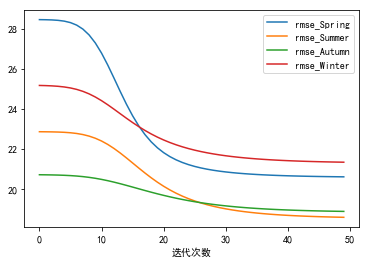

In [30]:
rmses_df.plot(x=["迭代次数"],y=["rmse_Spring","rmse_Summer","rmse_Autumn","rmse_Winter"])

In [31]:
# 注 因为每次的随机生成的初始特征矩阵是不确定的 所以运行的结果可能与实验结果
A=result[49][0]
B=result[49][1]
C=result[49][2]
D=result[49][3]
V=result[49][4]

# 5 各季节的PMF预测部分

In [32]:
## 5.1 预测训练集部分

In [33]:
# 使用训练集进行预测
# 根据概率矩阵学习到的隐类特征矩阵进行偏差的预测
def predict_bias(train,U,V):
    predict_bias=[]
    for user,item,bias in train:
        if user not in U.keys():
            continue
        if item not in V.keys():
            continue
        predict=np.dot(U[user],V[item].T)
        predict_bias.append(predict[0][0])
    return predict_bias

In [34]:
### 5.1.1 春

In [35]:
predict_bias_train_A=predict_bias(X_train_PMF_A.as_matrix(),A,V)

In [36]:
X_train_PMF_A["PMF预测偏差"]=predict_bias_train_A

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
y_train["LR预测值"]=y_predict_train_LR

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
# 添加真实值
X_train_PMF_A=pd.concat([X_train_PMF_A, y_train], axis=1, join='inner')

In [39]:
X_train_PMF_A["LR+PMF预测值"]=X_train_PMF_A["LR预测值"]+X_train_PMF_A["PMF预测偏差"]

In [40]:
X_train_PMF_A

,A,B,LR偏差,PMF预测偏差,R,LR预测值,LR+PMF预测值
5528,百思尚,16CLSX08/W16782;,30.156787,0.068852,72,41.843213,41.912065
10962,风车,SL181250D(SL1809);SL181251D(SL1809);SL181252T(...,-12.203613,-0.057721,29,41.203613,41.145892
5577,世纺纺织,SS10161005;SS10161005PR;SS10161006;SS10161008;,44.196424,0.079530,83,38.803576,38.883106
9253,蜂锦,10170917(CX1709);10170919(CX1709);10170937(CX1...,-7.293574,-0.117681,36,43.293574,43.175893
5396,蜂锦,TX160130P/PRT1(TX1606);,42.679277,0.307769,84,41.320723,41.628492
9059,麻之源,IN18W1506B;,-29.518971,0.081758,11,40.518971,40.600729
8887,风车,30170842(KX1708);,2.976680,-0.044258,46,43.023320,42.979062
6017,风车,FX160942T;FX160943P;,19.436049,0.005189,61,41.563951,41.569140
2345,鸿翔,S16320(019079);S16321(019072);S16322(019087);,-39.117263,-0.034802,87,126.117263,126.082462
9109,麻之源,SS1181020(原款号SS3181006);SS1181019(原款号SS3181007...,-23.816250,-0.018900,17,40.816250,40.797350


In [41]:
### 5.1.2 夏
predict_bias_train_B=predict_bias(X_train_PMF_B.as_matrix(),B,V)
X_train_PMF_B["PMF预测偏差"]=predict_bias_train_B

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [42]:
# 添加真实值
X_train_PMF_B=pd.concat([X_train_PMF_B, y_train], axis=1, join='inner')

In [43]:
X_train_PMF_B["LR+PMF预测值"]=X_train_PMF_B["LR预测值"]+X_train_PMF_B["PMF预测偏差"]
#X_train_PMF_B["LR+PMF预测值"]=X_train_PMF_B["LR+PMF预测值"].apply(s)

In [44]:
X_train_PMF_B

,A,B,LR偏差,PMF预测偏差,R,LR预测值,LR+PMF预测值
2807,麻之源,C15SS406TR/S16805;C15SS406TR/S16805-A;,14.789056,0.022678,58,43.210944,43.233622
9883,蜂锦,10171112-1(CX1711);10171135-1(CX1711);10171136...,-6.399750,-1.046639,43,49.399750,48.353111
6365,晟瑶,KS160909D(KX1609)KX140120D/FL;,13.084719,8.829737,55,41.915281,50.745018
3149,藏码源,TX160316T;,-4.262914,-0.021972,37,41.262914,41.240942
9871,蜂锦,EO180301T;EO180302D;EO180303D;,-29.924351,-1.609922,11,40.924351,39.314430
3030,上海诚贵,FX151003T;FX151047D;FX151054SK;,-2.046525,-0.075811,42,44.046525,43.970714
3615,蜂锦,TX160410P;TX160411T;TX160412P;,-2.262914,1.322079,39,41.262914,42.584992
6373,蜂锦,CX170213T;CX170214D;CX170230D;CX170220J;CX1702...,-5.933298,-0.469255,36,41.933298,41.464042
2868,麻之源,SS9151081;SS9151100;,-17.590976,-0.268924,24,41.590976,41.322052
6381,蜂锦,CX170227P/STN;CX170205T/STN;CX170206D/STN;,-2.760770,2.952695,36,38.760770,41.713465


In [45]:
### 5.1.3 秋

In [46]:
predict_bias_train_C=predict_bias(X_train_PMF_C.as_matrix(),C,V)
X_train_PMF_C["PMF预测偏差"]=predict_bias_train_C

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [47]:
# 添加真实值
X_train_PMF_C=pd.concat([X_train_PMF_C, y_train], axis=1, join='inner')

In [48]:
X_train_PMF_C["LR+PMF预测值"]=X_train_PMF_C["LR预测值"]+X_train_PMF_C["PMF预测偏差"]
#X_train_PMF_C["LR+PMF预测值"]=X_train_PMF_C["LR+PMF预测值"].apply(s)

In [49]:
X_train_PMF_C

,A,B,LR偏差,PMF预测偏差,R,LR预测值,LR+PMF预测值
4812,蜂锦,17CS07100;17CS07201;17CS07202;17CS07301;17CS07...,4.250475,0.435631,43,38.749525,39.185156
729,沃祥,CX160137T;,-18.978402,-0.630197,22,40.978402,40.348205
10545,苏州好得利,RC-001;RC-004;,-15.434229,-0.473354,23,38.434229,37.960875
676,蜂锦,WX160313P;,19.400015,2.773404,61,41.599985,44.373389
756,六福纺织,WX160310PS;,10.959968,-0.136612,50,39.040032,38.903420
389,沃祥,FX160225TW;,6.238049,-0.487571,51,44.761951,44.274380
569,风车,WX160276T;,35.940522,0.104395,77,41.059478,41.163873
604,宙圣（美域）,SG0322/13752;,10.521442,0.004923,61,50.478558,50.483481
10267,苏州好得利,A180209(A18D);A180218(A18D)同A180203;A180219(A1...,-16.452246,1.016519,22,38.452246,39.468766
322,上海诚贵,TX160722T（经销）;TX160723D（经销）;,-2.262851,-0.428757,40,42.262851,41.834094


In [50]:
### 5.1.4 冬

In [51]:
predict_bias_train_D=predict_bias(X_train_PMF_D.as_matrix(),D,V)
X_train_PMF_D["PMF预测偏差"]=predict_bias_train_D
# 添加真实值
X_train_PMF_D=pd.concat([X_train_PMF_D, y_train], axis=1, join='inner')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [52]:
X_train_PMF_D["LR+PMF预测值"]=X_train_PMF_D["LR预测值"]+X_train_PMF_D["PMF预测偏差"]

In [53]:
## 5.2 测试集部分

In [54]:
X_test_PMF=X_test[["A","B","Season"]]
X_test_PMF["Real"]=y_test.values

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [55]:
# 使用线性回归进行预测
y_predict_test_LR=reg.predict(X_test_std)
y_test["LR预测值"]=y_predict_test_LR

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [56]:
# 提取四季数据集
X_test_PMF_A=X_test_PMF[X_test_PMF["Season"]=="春"]
X_test_PMF_B=X_test_PMF[X_test_PMF["Season"]=="夏"]
X_test_PMF_C=X_test_PMF[X_test_PMF["Season"]=="秋"]
X_test_PMF_D=X_test_PMF[X_test_PMF["Season"]=="冬"]

In [57]:
X_test_PMF_A.drop(columns=["Season"],inplace=True)
X_test_PMF_B.drop(columns=["Season"],inplace=True)
X_test_PMF_C.drop(columns=["Season"],inplace=True)
X_test_PMF_D.drop(columns=["Season"],inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is 

In [58]:
X_test_PMF_A=pd.concat([X_test_PMF_A,y_test],axis=1,join="inner").drop(columns=["R"])
X_test_PMF_B=pd.concat([X_test_PMF_B,y_test],axis=1,join="inner").drop(columns=["R"])
X_test_PMF_C=pd.concat([X_test_PMF_C,y_test],axis=1,join="inner").drop(columns=["R"])
X_test_PMF_D=pd.concat([X_test_PMF_D,y_test],axis=1,join="inner").drop(columns=["R"])

In [59]:
# 使用训练的U V进行测试集偏差预测
def predict_test_bias(test,U,V):
    results=[]
    for user,item,rui,predict_LR in test:
        if user not in U.keys():
            continue
        if item not in V.keys():
            continue
        predict=np.dot(U[user],V[item].T)
        results.append([user,item,predict_LR,predict[0][0],rui])
    return results

In [60]:
### 5.2.1 春

In [61]:
X_result_test_A=predict_test_bias(X_test_PMF_A.as_matrix(),A,V)

In [62]:
X_result_test_A=pd.DataFrame(X_result_test_A)
X_result_test_A=X_result_test_A.rename(columns={0: "A", 1: "B",2: "LR预测值",3: "PMF偏差预测值",4: "Real"})

In [63]:
X_result_test_A["LR+CPMF"]=X_result_test_A["LR预测值"]+X_result_test_A["PMF偏差预测值"]

In [64]:
### 5.2.2 夏

In [65]:
X_result_test_B=predict_test_bias(X_test_PMF_B.as_matrix(),B,V)
X_result_test_B=pd.DataFrame(X_result_test_B)
X_result_test_B=X_result_test_B.rename(columns={0: "A", 1: "B",2: "LR预测值",3: "PMF偏差预测值",4: "Real"})
X_result_test_B["LR+CPMF"]=X_result_test_B["LR预测值"]+X_result_test_B["PMF偏差预测值"]

In [66]:
### 5.2.3 秋

In [67]:
X_result_test_C=predict_test_bias(X_test_PMF_C.as_matrix(),C,V)
X_result_test_C=pd.DataFrame(X_result_test_C)
X_result_test_C=X_result_test_C.rename(columns={0: "A", 1: "B",2: "LR预测值",3: "PMF偏差预测值",4: "Real"})
X_result_test_C["LR+CPMF"]=X_result_test_C["LR预测值"]+X_result_test_C["PMF偏差预测值"]

In [68]:
### 5.2.4 冬

In [69]:
X_result_test_D=predict_test_bias(X_test_PMF_D.as_matrix(),D,V)
X_result_test_D=pd.DataFrame(X_result_test_D)
X_result_test_D=X_result_test_D.rename(columns={0: "A", 1: "B",2: "LR预测值",3: "PMF偏差预测值",4: "Real"})
X_result_test_D["LR+CPMF"]=X_result_test_D["LR预测值"]+X_result_test_D["PMF偏差预测值"]

# 6 RMSE

In [70]:
def RMSE(deviation):
    sum=0.0
    for i in deviation:
        sum+=i*i
    rmse=np.sqrt(sum/len(deviation))
    return rmse

In [71]:
## 6.1 训练集

In [72]:
#  春  LR+PMF
RMSE(X_train_PMF_A["LR+PMF预测值"]-X_train_PMF_A["R"])

20.594646202476

In [73]:
#  春  LR
RMSE(X_train_PMF_A["LR预测值"]-X_train_PMF_A["R"])

28.449719182715484

In [74]:
#  夏 LR+PMF
RMSE(X_train_PMF_B["LR+PMF预测值"]-X_train_PMF_B["R"])

18.57318045518825

In [75]:
# 夏 LR
RMSE(X_train_PMF_B["LR预测值"]-X_train_PMF_B["R"])

22.84929989994795

In [76]:
# 秋 LR+PMF
RMSE(X_train_PMF_C["LR+PMF预测值"]-X_train_PMF_C["R"])

18.86848461802753

In [77]:
# 秋 LR
RMSE(X_train_PMF_C["LR预测值"]-X_train_PMF_C["R"])

20.702362770016265

In [78]:
# 冬 LR+PMF
RMSE(X_train_PMF_D["LR+PMF预测值"]-X_train_PMF_D["R"])

21.325136750631668

In [79]:
# 冬 LR
RMSE(X_train_PMF_D["LR预测值"]-X_train_PMF_D["R"])

25.16595187160542

In [80]:
## 6.2 测试集部分

In [81]:
# 春 LR+PMF
RMSE(X_result_test_A["LR+CPMF"]-X_result_test_A["Real"])

42.06549662265165

In [82]:
# 春 LR
RMSE(X_result_test_A["LR预测值"]-X_result_test_A["Real"])

46.224770278623446

In [83]:
# 夏 LR+PMF
RMSE(X_result_test_B["LR+CPMF"]-X_result_test_B["Real"])

21.599929277670316

In [84]:
# 夏 LR
RMSE(X_result_test_B["LR预测值"]-X_result_test_B["Real"])

21.678006631209175

In [85]:
# 秋 LR+PMF
RMSE(X_result_test_C["LR+CPMF"]-X_result_test_C["Real"])

20.16471898735351

In [86]:
# 秋 LR
RMSE(X_result_test_C["LR预测值"]-X_result_test_C["Real"])

20.38583324116933

In [87]:
# 冬 LR+PMF
RMSE(X_result_test_D["LR+CPMF"]-X_result_test_D["Real"])

27.750073430892293

In [88]:
# 冬 LR
RMSE(X_result_test_D["LR预测值"]-X_result_test_D["Real"])

30.524596742155186

In [89]:
def RMSE_Mean(r1,r2,r3,r4):
    rmse=0.0
    rmse=(r1+r2+r3+r4)/4
    return rmse

In [90]:
RMSE_Mean(RMSE(X_result_test_A["LR+CPMF"]-X_result_test_A["Real"]),RMSE(X_result_test_B["LR+CPMF"]-X_result_test_B["Real"]),RMSE(X_result_test_C["LR+CPMF"]-X_result_test_C["Real"]),RMSE(X_result_test_D["LR+CPMF"]-X_result_test_D["Real"]))

27.895054579641943

In [91]:
RMSE_Mean(RMSE(X_result_test_A["LR预测值"]-X_result_test_A["Real"]),RMSE(X_result_test_B["LR预测值"]-X_result_test_B["Real"]),RMSE(X_result_test_C["LR预测值"]-X_result_test_C["Real"]),RMSE(X_result_test_D["LR预测值"]-X_result_test_D["Real"]))

29.703301723289286